In [1]:
import numpy as np
import matplotlib.pyplot as plt
from CLogDKPd import CLogDKPd_MGE, CLogDKPd_MGmB, CLogDKPd_MGE_Ordenado, sigmoid, threshold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

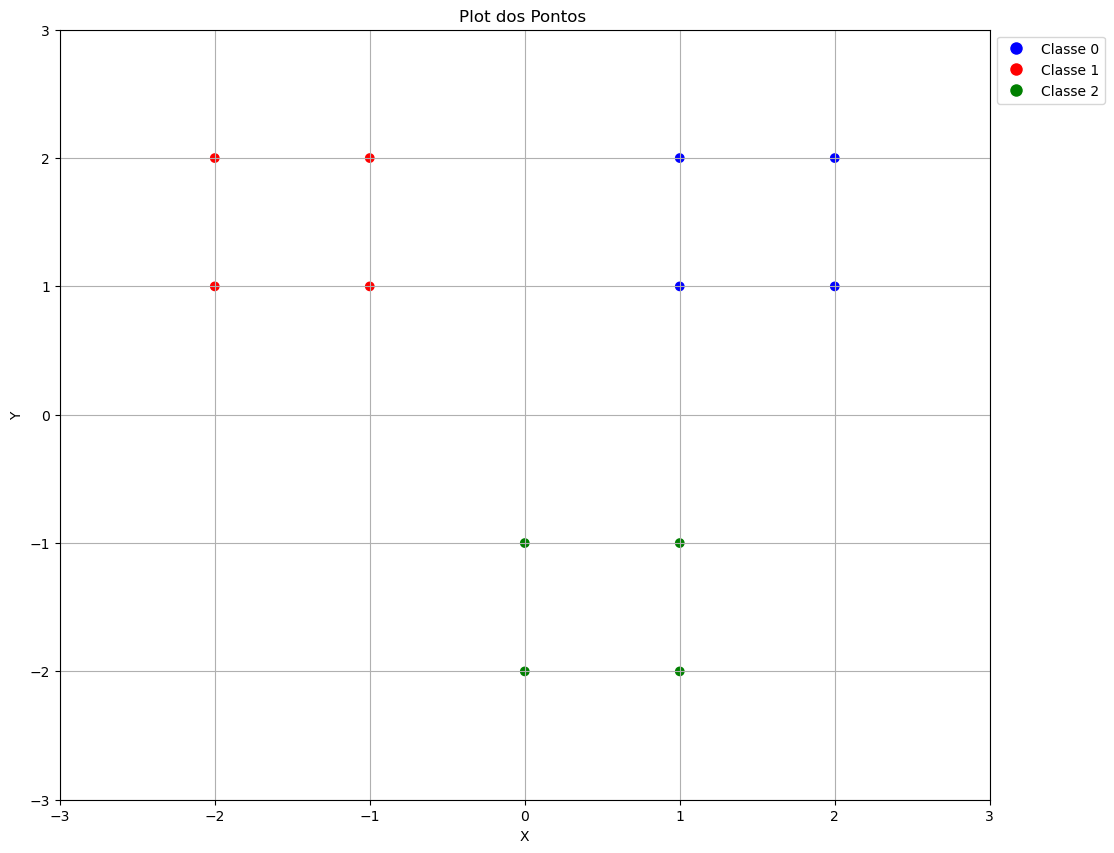

In [2]:
# Dados fornecidos
X = np.array([[1, 1, 1], [1, 1, 2], [1, 2, 2], [1, 2, 1],
              [1, -1, 1], [1, -1, 2], [1, -2, 2], [1, -2, 1],
              [1, 0, -1], [1, 0, -2], [1, 1, -2], [1, 1, -1]])
Y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

# Coordenadas X e Y (ignorando a primeira coluna de 1s)
x_coords = X[:, 1]
y_coords = X[:, 2]

# Mapeando as classes para cores com verde escuro e brilhante para a classe 2
colors = {0: 'b', 1: 'r', 2: 'g'}  # Verde escuro e brilhante
class_colors = [colors[y] for y in Y]

# Visualizando os pontos
plt.figure(figsize=(12, 10))  # Aumenta o tamanho do gráfico
scatter = plt.scatter(x_coords, y_coords, c=class_colors)
plt.title("Plot dos Pontos ")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

# Definindo os limites dos eixos
plt.xlim(-3, 3)
plt.ylim(-3, 3)
# Adicionando legenda fora do gráfico
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=f'Classe {i}') for i in colors]
plt.legend(handles=handles, title="", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [3]:
X = np.array([[1,1,1],[1,1,2],[1,2,2],[1,2,1],[1,-1,1],[1,-1,2],[1,-2,2],[1,-2,1],[1,0,-1],[1,0,-2],[1,1,-2],[1,1,-1]])
Y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])



train_filter = np.where((Y == 0) | (Y == 1))
x_train_0_1, y_train_0_1 = X[train_filter], Y[train_filter]
y_train_0_1[y_train_0_1==0]=0
y_train_0_1[y_train_0_1==1]=1

train_filter = np.where((Y == 0) | (Y == 2))
x_train_0_2, y_train_0_2 = X[train_filter], Y[train_filter]
y_train_0_2[y_train_0_2==0]=0
y_train_0_2[y_train_0_2==2]=1

train_filter = np.where((Y == 1) | (Y == 2))
x_train_1_2, y_train_1_2 = X[train_filter], Y[train_filter]
y_train_1_2[y_train_1_2==2]=0
y_train_1_2[y_train_1_2==1]=1

In [4]:
eta = 0.5
epochs = 50
alpha = np.zeros(len(x_train_0_1))
d=2
batch_size = len(x_train_0_1)
alpha_0_1, E_0_1 = CLogDKPd_MGmB(x_train_0_1, y_train_0_1, alpha, eta, epochs, d, batch_size)

In [5]:
eta = 0.5
epochs = 50
alpha = np.zeros(len(x_train_0_2))
d=2
batch_size = len(x_train_0_2)
alpha_0_2, E_0_2 = CLogDKPd_MGmB(x_train_0_2, y_train_0_2, alpha, eta, epochs, d, batch_size)

In [6]:
eta = 0.5
epochs = 50
alpha = np.zeros(len(x_train_1_2))
d=2
batch_size = len(x_train_1_2)
alpha_1_2, E_1_2 = CLogDKPd_MGmB(x_train_1_2, y_train_1_2, alpha, eta, epochs, d, batch_size)

In [7]:
X_testes = np.array([[1,1.5,1.5],[1,-1.5,1.5],[1,0.5,-1.5]])
for i in range(len(X_testes)):
    elemento = X_testes[i]
    p_chapeu =0
    for i in range(len(x_train_0_1)):
        p_chapeu += (alpha_0_1[i] * (np.dot(elemento,x_train_0_1[i])**2) )
    previsao_0_1 = (sigmoid(p_chapeu))
    p_chapeu =0
    for i in range(len(x_train_0_2)):
        p_chapeu += (alpha_0_2[i] * (np.dot(elemento,x_train_0_2[i])**2) )
    previsao_0_2 = (sigmoid(p_chapeu))
    p_chapeu =0
    for i in range(len(x_train_1_2)):
        p_chapeu += (alpha_1_2[i] * (np.dot(elemento,x_train_1_2[i])**2) )
    previsao_1_2 = (sigmoid(p_chapeu))
    pontuacao = [0.0, 0.0, 0.0]

    # Update scores based on predictions
    if threshold(previsao_0_1) == 0:
        pontuacao[0] += 1 + previsao_0_1
    if threshold(previsao_0_2) == 0:
        pontuacao[0] += 1 + previsao_0_2

    if threshold(previsao_0_1) == 1:
        pontuacao[1] += previsao_0_1
    if threshold(previsao_1_2) == 1:
        pontuacao[1] += previsao_1_2

    if threshold(previsao_1_2) == 0:
        pontuacao[2] += 1 + previsao_1_2
    if threshold(previsao_0_2) == 1:
        pontuacao[2] += previsao_0_2
    print(np.argmax(pontuacao))

0
1
2


In [8]:
len(X_testes)

3